In [1]:
import import_ipynb
import matplotlib.pyplot as plt 
import numpy as np 
import random
import time 
import math
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
from Internal_Regret_Matching_Algorithm import internal_regret_matching_2, euclidean_distance
from multiplicative_weights_algorithm import no_of_actions, multiplicative_weights
from Internal_Regret_Matching_Algorithm import calculate_regret_up_to_time_2

importing Jupyter notebook from Internal_Regret_Matching_Algorithm.ipynb
importing Jupyter notebook from multiplicative_weights_algorithm.ipynb


## Games to be Analyzed

In [224]:
#todo:add relative frequency outcome 

matching_pennies = [[[1.0,-1.0], [-1.0, 1.0]], 
                    [[-1.0, 1.0], [1.0,-1.0]]]

# [0.5, 0.5], [0.5, 0.5]
# p1 = (0.5-e, 0.5+e)
# -1* (0.5-e) + 0.5+e = 2e
# 1* (0.5-e) - 1 *(0.5+e)  = -2e 
# as e -> 0 no difference wanted 

schere_stein_papier = [[[0,0], [-1, 1], [1, -1]], 
                        [[1,-1], [0, 0], [-1, 1]],
                        [[-1,1], [1, -1], [0, 0]]]

test_game_2 = np.array([[[0,0], [-1, 1], [1, -1]], 
              [[1,-1], [0, 0], [-1, 1]]], dtype=object)

prisoners_dilemma = [[[3,3], [0, 5]],
                     [[5,0], [1, 1]]]

# [e,1-e]
# 3 * (e) + 0 * 1-e = 3e 
# 5 * (e) + 1 * (1-e) = 1 + 4e -> preference 

shapley_game = [[[1,0], [0, 1], [0, 0]], 
                [[0,0], [1, 0], [0, 1]],
                [[0,1], [0, 0], [1, 0]]]

# From: No-regret Dynamics and Fictitious Play: https://hal.archives-ouvertes.fr/hal-00713871/document
identical_interest_game = [[[2,2], [1,1],[-4,-4]],
                          [[1,1],[0,0],[-1,-1]],
                          [[-4,-4],[-1,-1],[-2,-2]]]

# From: No-regret Dynamics and Fictitious Play: https://hal.archives-ouvertes.fr/hal-00713871/document
eps = 0.5 

coordination_game = [[[1,1],[1,1],[0,0],[0,0]],
                    [[1-eps,1-eps],[1-eps,1-eps],[-eps,-eps],[-eps,-eps]],
                    [[0,0],[0,0],[1,1],[1,1]], 
                    [[-eps,-eps],[-eps,-eps],[1-eps,1-eps],[1-eps,1-eps]]]


expanded_chicken = np.array([[[6,6], [0,0], [2,7]],
                             [[0,0], [4,4], [3,0]],
                             [[7,2], [0,3], [0,0]]])

#trembling hand = mixed ne (2/3, 1/3), (1/3, 2/3)
battle_of_sexes = np.array([[[2,1], [0,0]],
                            [[0,0], [1,2]]])


# [1,0], [1,0]
# p1 = (1-e, e)
# 1-e -> 1 -> preference
# 2*e -> 0


# [2/3, 1/3], [1/3, 2/3]
# p1 = (2/3-e, 1/3+e)
# 1* (2/3-e) = 2/3 -1e  -> 2/3
# 2* (1/3+e) = 2/3 +2e  -> 2/3



chicken = np.array([[[4,4], [2,8]], 
                    [[8,2], [0,0]]])



#From https://arxiv.org/pdf/1207.0660.pdf
ficticious_play_cycles = [[[1, (math.sqrt(2))], [0,0]],
                         [[0,0], [(math.sqrt(2)),1]]]

#From gamut: 

#benefit of having the resource
#cost of interacting
BOR = 2
COI = 4
hawk_and_dowe = [[[0.5 * (BOR - COI), 0.5 * (BOR - COI)], [BOR, 0]], 
                [[0, BOR], [0.5 * BOR, 0.5 * BOR]]]

# 0.75 * A + 0.25 *C 

# -0.25 + 1,5 = 1.25
# 0 + 0.75 = 0.75 

#two pure equilbria, one mixed 
# (A,A), (B,B), (0,75A, 0,75*A)
#https://de.wikipedia.org/wiki/Hirschjagd
stag_and_hare = [[[4,4], [0, 3]],[[3, 0], [3,3]]]


# risk factor F_a =  4* p + (1-p) * 0 = 3p + 3(1-p) 4p = 3p + 3 -3p -> p = 3/4
# risk factor F_b =  4*(1-p) + 

#see https://de.wikipedia.org/wiki/Hirschjagd
extended_stag_and_hare = [[[]]]

#from https://www.researchgate.net/publication/310470795_Melioration_Learning_in_Two-Person_Games
#inspection_game
#non zero sum, single mixed equilibrium 
#unique nash equilibrium (0.5 *A, 5/7 * A)

inspection_game = [[[8, 15], [15, 10]],
                  [[10,5],[10,10]]]

inspection_game_low_punishment = [[[-1, 5], [5,0]], 
                                   [[0,-5], [0,0]]]

inspection_game_high_punishment = [[[-20, 5], [5,0]], 
                                   [[0,-5], [0,0]]]

# a game with three nash equilibria 
# (A,A)(B,A),(B,B)
game_three_nash = [[[10, 10], [0,0]], 
                   [[10, 10], [10,10]]]

# [1-e, e]
# (1-e) * 10 + e * 10 = 10 -> pref left
# (1-e) * 0 + e * 10 = 10e 

# [1-e, e]
# 10 * (1-e) +0 * e = 10 -10e  -> 10 -10 e
# 10 * (1-e) + 10 * e = 10 -> pref down 

coordination_game_2 = [[[5, 5], [0,0]], 
                       [[0, 0], [5,5]]]

four_by_four = [[[1,0], [0,1], [0,1], [0,1]],
                [[0,1], [0,1], [1,0], [1,0]], 
                [[0,1], [1,0], [0,1], [1,0]], 
                [[0,1], [1,0], [1,0], [0,1]]]

five_by_five = [[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0]],
                [[0, 1], [0, 1], [1, 0], [1, 0], [0, 1]],
                [[0, 1], [2, 1], [0, 1], [1, 0], [1, 0]],
                [[0, 1], [1, 0], [1, 0], [0, 1], [1, 0]],
                [[1, 0], [1, 0], [0, 1], [1, 0], [0, 1]]]


weak_2x2 = [[[1,1], [1,2]], 
           [[0,2], [2,2]]]

harm_my_neighbor = [[[2,2], [1,2]], 
                    [[2,1], [2,2]]]



test_game = np.array([[[0,1],[2,3]],[[3,4],[5,6]]])
test_strategy = np.array([[0.06, 0.14], [0.24, 0.56]])

two_mixed_NE = ([[[8,1], [0,2], [4,3]],
                             [[3,1], [4,4], [0,0]],
                             [[5,0], [3,3], [1,4]]])

In [208]:
games = {"matching_pennies": matching_pennies, "shapley_game": shapley_game, 
         "schere_stein_papier":schere_stein_papier, "prisoners_dilemma": prisoners_dilemma}

nashEqs = games.copy()
nashEqs["matching_pennies"] = [np.full((2,2), 0.5)]
nashEqs["shapley_game"] = [np.full((2,3), 1/3)]
nashEqs["schere_stein_papier"] = [np.full((2,3), 1/3)]
nashEqs["prisoners_dilemma"] = [np.array([[0,1],[0,1]])]
nashEqs["game_three_nash"] = [np.array([[0,1],[0,1]]), np.array([[0,1],[1,0]]), np.array([[1,0],[1,0]])]
nashEqs["stag_and_hare"] = [np.array([[1,0],[1,0]]), np.array([[0,1],[0,1]])]
nashEqs["battle_of_sexes"] = [np.array([[1,0],[1,0]]), np.array([[0,1],[0,1]]), np.array([[2/3,1/3],[1/3,2/3]])]
nashEqs["chicken"] = [np.array([[1,0],[0,1]]), np.array([[0,1],[1,0]]), np.array([[1/3, 2/3],[1/3,2/3]])]
nashEqs["coordination_game_2"] = [np.array([[1,0],[1,0]]), np.array([[0,1],[0,1]])]
nashEqs["weak2x2"] = [np.array([[0,1],[0,1]])]
nashEqs["hawk_and_dowe"] = [np.array([[0.5,0.5],[0.5,0.5]])] + [np.array([[1,0],[0,1]]), np.array([[0,1],[1,0]])]
nashEqs["inspection_game"] = [np.array([[0.5,0.5],[5/7,2/7]])]
nashEqs["harm_my_neighbor"] = [np.array([[1,0],[1,0]]), np.array([[0,1],[0,1]])]

In [7]:
games

{'matching_pennies': [[[1.0, -1.0], [-1.0, 1.0]], [[-1.0, 1.0], [1.0, -1.0]]],
 'shapley_game': [[[1, 0], [0, 1], [0, 0]],
  [[0, 0], [1, 0], [0, 1]],
  [[0, 1], [0, 0], [1, 0]]],
 'schere_stein_papier': [[[0, 0], [-1, 1], [1, -1]],
  [[1, -1], [0, 0], [-1, 1]],
  [[-1, 1], [1, -1], [0, 0]]],
 'prisoners_dilemma': [[[3, 3], [0, 5]], [[5, 0], [1, 1]]]}

## Generate IR & MW Results

In [215]:
# my > M^i  * (m^i -1) for all players i
# M^i >= abs(u^i(k, s^-i)- u^i(j, s^-i)) for all j, k (maximum absolute payoff - minimum absolute payoff)
# m^i = number of strategies player i
# return my for each player individually 
def choose_my(game):
    ret = []
    for i in range(2): 
        m_i = no_of_actions(game, i)
        flat_payoffs = np.transpose(game)[i].flatten()
        M_i = np.absolute(np.amax(flat_payoffs) - np.amin(flat_payoffs)) 
        ret.append(M_i * (m_i-1) + 0.0001)
    return ret 

In [9]:
def choose_optimal_beta(game, iterations): 
    return 1/(math.sqrt(8*math.log(no_of_actions(game, 0))/iterations)+1)

In [10]:
choose_optimal_beta(shapley_game, 100000)

0.9907121602530613

In [11]:
def sample_from_distribution(probabilities):
    return random.choices(range(0,len(probabilities)), weights = probabilities)[0]

In [12]:
# generates a random initial distribution for a game 
def initial_random_distribution(game): 
    no_of_actions_p0 = no_of_actions (game, 0)
    no_of_actions_p1 = no_of_actions (game, 1)
    random_dist_p0 = np.random.random_sample(no_of_actions_p0)
    random_dist_p1 = np.random.random_sample(no_of_actions_p1)
    #normalize 
    random_dist_p0 = random_dist_p0 / sum(random_dist_p0)
    random_dist_p1 = random_dist_p1 / sum(random_dist_p1)
    
    return np.array([random_dist_p0.tolist(), random_dist_p1.tolist()], dtype = object)

In [13]:
def get_IR_MW_game_results(game, max_steps, epsilon): 
    init_distribution = initial_random_distribution(game)
    my = choose_my(game)
    beta = choose_optimal_beta(game,max_steps)
    # both return distributions and history of play
    IR = internal_regret_matching_2(game, max_steps, init_distribution, my, epsilon)
    MW_dis = multiplicative_weights(game, epsilon, beta, init_distribution, max_steps)
    MW_history = []
    for dis in MW_dis:
        p0_action = sample_from_distribution (dis[0])
        p1_action = sample_from_distribution (dis[1])
        MW_history.append([p0_action, p1_action])
    return (IR, (MW_dis,MW_history))

In [91]:
def get_IR_MW_game_results_by_dis(game, max_steps, epsilon, init_distribution, mult_IR): 
    my = choose_my(game)
    beta = choose_optimal_beta(game,max_steps)
    # both return distributions and history of play
    IR_dists = []
    for _ in range(mult_IR):
        IR_dists.append(internal_regret_matching_2(game, max_steps, init_distribution, my, epsilon)[0])
    MW_dis = multiplicative_weights(game, epsilon, beta, init_distribution, max_steps)
    return (np.average(np.array(IR_dists, dtype=object), axis = 0), MW_dis)

In [84]:
game = matching_pennies
get_IR_MW_game_results_by_dis(game, 2, 0.001, initial_random_distribution(game))

(array([[[0.5321533363796431, 0.4678466636203568],
         [0.47865487111391225, 0.5213451288860877]],
 
        [[0.5660766681898216, 0.4339233318101784],
         [0.3393274355569561, 0.6606725644430439]]], dtype=object),
 [array([[0.5321533363796431, 0.4678466636203569],
         [0.47865487111391225, 0.5213451288860877]], dtype=object),
  array([[0.5217128688425643, 0.4782871311574356],
         [0.4629874251862666, 0.5370125748137334]], dtype=object)])

## Plot Results

In [15]:
# returns the history of strategy profiles for player
def get_history(player_no, history): 
    return [strategy[player_no] for strategy in history]

In [16]:
# plots a history of the mean distribution for each action of each player

def plot_history(history, game_name, algorithm): 
    
    hist_p0 = np.transpose(get_history(0, history))
    hist_p1 = np.transpose(get_history(1, history))
    
    fig, ax = plt.subplots()
    
    for action_no, action_history_p0 in enumerate(hist_p0):
        ax.plot(range(len(action_history_p0)), action_history_p0, label = f"player:1, action:{chr(65+action_no)}", linestyle = ':')
    
    for action_no, action_history_p1 in enumerate(hist_p1):
        ax.plot(range(len(action_history_p1)), action_history_p1, label =f"player:2, action:{chr(65+action_no+len(hist_p0))}", linestyle = '-')
    
    ax.set_title(f"{algorithm} with {game_name}")
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Averaged strategy probability')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_{algorithm}.png') 
    
    

In [17]:
def plot_history_beta(history, beta): 
    hist_p0 = np.transpose(get_history(0, history))
    hist_p1 = np.transpose(get_history(1, history))
    
    fig, ax = plt.subplots()
    
    for action_no, action_history_p0 in enumerate(hist_p0):
        ax.plot(range(len(action_history_p0)), action_history_p0, label = f"player:1, action:{chr(65+action_no)}", linestyle = ':')
    
    for action_no, action_history_p1 in enumerate(hist_p1):
        ax.plot(range(len(action_history_p1)), action_history_p1, label =f"player:2, action:{chr(65+action_no+len(hist_p0))}", linestyle = '-')
    
    ax.set_title(f"beta = {beta}")
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Averaged strategy probability')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{beta}_prisoner.png') 

In [18]:
def plot_history_my(history, my): 
    hist_p0 = np.transpose(get_history(0, history))
    hist_p1 = np.transpose(get_history(1, history))
    
    fig, ax = plt.subplots()
    
    for action_no, action_history_p0 in enumerate(hist_p0):
        ax.plot(range(len(action_history_p0)), action_history_p0, label = f"player:1, action:{chr(65+action_no)}", linestyle = ':')
    
    for action_no, action_history_p1 in enumerate(hist_p1):
        ax.plot(range(len(action_history_p1)), action_history_p1, label =f"player:2, action:{chr(65+action_no+len(hist_p0))}", linestyle = '-')
    
    ax.set_title(f"my = {my}")
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Averaged strategy probability')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/my_{my}_prisoner.png')

In [19]:
def multiplicative_weights_plot(game, game_name, init_history, epsilon = 0.00001, max_steps = 100000, beta = -1): 
    if beta == -1: 
        beta = choose_optimal_beta(game,max_steps)
    mean_history = multiplicative_weights(game, epsilon, beta, init_history, max_steps)
    plot_history(mean_history, game_name, "Multiplicative Weights")

In [20]:
def internal_regret_matching_plot(game, game_name, init_distribution, max_steps = 100000, epsilon = 0.00001, my = -1):
    if my == -1:
        my = choose_my(game)
    distributions, history = internal_regret_matching_2(game, max_steps, init_distribution, my, epsilon)
    plot_history(distributions, game_name, "Internal Regret Matching")

In [21]:
def plot_comparison_MWA_vs_IRM(game, game_name, init_distribution, epsilon = 0.000001, max_steps = 100000):
    internal_regret_matching_plot(game, game_name, init_distribution, max_steps , epsilon)
    multiplicative_weights_plot(game, game_name, init_distribution, epsilon, max_steps)

In [22]:
#https://de.wikipedia.org/wiki/Experimentelle_Konvergenzordnung
def experimental_order_of_convergence(mean_histories, expectedConvergence):
    eoc_values = []
    for i in range(len(mean_histories)-2):
        numerator = np.log(euclidean_distance(mean_histories[i+1], expectedConvergence) / euclidean_distance(mean_histories[i+2], expectedConvergence))
        denominator= np.log(euclidean_distance(mean_histories[i], expectedConvergence) / euclidean_distance(mean_histories[i+1], expectedConvergence))
        eoc_values.append(numerator / denominator)
    return np.mean(eoc_values)

In [23]:
def stepwise_mean_euclidean_distance(mean_histories, expectedConvergence): 
    return np.mean([euclidean_distance(history, expectedConvergence) for history in mean_histories])

In [24]:
def all_games_experimental_convergence_speed(games, nashEqs, convergence_function, epsilon = 0.01, max_steps = 1000): 
    multiplicative_weights_speed = []
    internal_regret_speed = []
    game_names = games.keys()
    beta = choose_optimal_beta(game,max_steps)
    for game_name , game in games.items(): 
        my = choose_my (game)
        init_distribution = initial_random_distribution(game)
        IR, _ = internal_regret_matching_2(game, max_steps, init_distribution, my, epsilon)
        MW = multiplicative_weights(game, epsilon, beta, init_distribution, max_steps)
        multiplicative_weights_speed.append(convergence_function(MW, nashEqs[game_name]))
        internal_regret_speed.append(convergence_function(IR, nashEqs[game_name]))
    return multiplicative_weights_speed, internal_regret_speed

In [25]:
def plot_all_games_experimental_convergence_speed(games, nashEqs, convergence_function,  epsilon = 0.001, max_steps = 5000):
    MW, IR = all_games_experimental_convergence_speed(games, nashEqs, convergence_function, epsilon = 0.001, max_steps = 5000)
    x = np.arange(len(games))  
    width = 0.30
    
    labels = games.keys()
    fig, ax = plt.subplots()
    
    MW_bars = ax.bar(x-0.15, MW, width, label='Multiplicative Weights')
    IR_bars = ax.bar(x+0.15, IR, width, label='Internal Regret Matching')
    ax.set_ylabel(convergence_function.__name__)
    ax.set_title(convergence_function.__name__ + " in Multiplicative Weights and Internal Regret Matching")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    fig.tight_layout()
    
    plt.show()
    fig.savefig(f'/Users/linuskratz/plot_BA/{convergence_function}.png')

## Stepwise Regret Calculation 

In [26]:
def cumulative_history(game, history): 
    cumulative_history = np.zeros(np.array(game).shape[0:2])
    for play in history: 
        cumulative_history[play[0]][play[1]] = cumulative_history[play[0]][play[1]] + 1
    return cumulative_history

In [27]:
# calculates the replacement payoff at time t of playing replacement_action_k instead of the replaced_action_j played
# this method is only called when replaced_action_j is played
def calculate_regret_up_to_time(game, time, player, cumulative_history, new_strategy, old_strategy ): 
    no_actions_other_player = no_of_actions(game, (1-player))
    cumulative_regret = 0
    for other_player_action in range(no_actions_other_player):
        replacement_utility = calculate_utility(game, player, replacement_action_k, other_player_action)
        replaced_utility = calculate_utility(game, player, replaced_action_j, other_player_action)
        regret = replacement_utility - replaced_utility
        cumulative_regret += historical_occurences(cumulative_history, player, replaced_action_j, other_player_action) * regret
    return max(1/time * cumulative_regret, 0)

In [28]:
# average regret per step 
def calculate_regret_to_best_pure_play(game, cumulative_history): 
    action_payoffs = np.transpose(game) * np.transpose(cumulative_history)
    time = sum(sum(cumulative_history))
    regret = []
    for player in range(2): 
        payoff = []
        if player == 0: 
            payoff = list(map(sum, np.transpose(action_payoffs[player])))
        else: 
            payoff = list(map(sum, action_payoffs[player]))
        best_strategy = np.argmax(payoff)
        player_regret = 0
        for action in range(np.array(game).shape[player]): 
            if action != best_strategy: 
                abc = calculate_regret_up_to_time_2(game, time, player, cumulative_history, action, best_strategy)
                player_regret += calculate_regret_up_to_time_2(game, time, player, cumulative_history, action, best_strategy)
        regret.append(player_regret)
    return regret

In [29]:
# example of schere_stein_papier with 0 regret for both players with regards to action with best_payoff
# best_strategy_p0 = 2
# regret p0 (0 -> 2) = 118  * -1 + 110 *2 + 104 * -1 = -2
# regret p0 (1 -> 2) = 105 * -2 + 107 * 1 + 102 * 1 =  -1
# regret p1 (0 -> 2) = 118 * -1 + 105 * 2 + 99 * -1 =  -7
# regret p1 (1 -> 2) = 110 * -2 + 107 * 1 + 113 * 1 =  0 
a = np.array([[118, 110, 104],
              [105, 107, 102],
              [ 99, 113, 119]])

In [30]:
schere_stein_papier

[[[0, 0], [-1, 1], [1, -1]],
 [[1, -1], [0, 0], [-1, 1]],
 [[-1, 1], [1, -1], [0, 0]]]

In [31]:
def compare_regret_over_time_MW_vs_IR(game, iterations): 
    IR, MW = get_IR_MW_game_results(game, iterations, 0.00001)
    regret = []
    for time in range(min(len(IR[1]), len(MW[1]))): 
        IR_cumulative_history = cumulative_history(game, IR[1][:(time+1)])
        MW_cumulative_history = cumulative_history(game, MW[1][:(time+1)]) 
        IR_regret = calculate_regret_to_best_pure_play(game, IR_cumulative_history)
        MW_regret = calculate_regret_to_best_pure_play(game, MW_cumulative_history)
        regret.append([IR_regret,MW_regret])
    return regret

In [274]:
def plot_player_regret(game, game_name, iterations, scaling = 100): 
    regret = np.transpose(compare_regret_over_time_MW_vs_IR(game, iterations))
    
    IR_regret_p0 = regret[0][0]
    MW_regret_p0 = regret[0][1]
    
    IR_regret_p1 = regret[1][0]
    MW_regret_p1 = regret[1][1]
    
    
    x_new = np.linspace(scaling, iterations, num = iterations // scaling)
    IR_P0_spline = make_interp_spline(range(len(IR_regret_p0)), IR_regret_p0, k=3)
    #MW_P0_spline = make_interp_spline(range(len(MW_regret_p0)), MW_regret_p0, k=3)    
    IR_P1_spline = make_interp_spline(range(len(IR_regret_p1)), IR_regret_p1, k=3)
    #MW_P1_spline = make_interp_spline(range(len(MW_regret_p1)), MW_regret_p1, k=3)
        
    new_IR_p0 = IR_P0_spline(x_new)
    #new_MW_p0 = MW_P0_spline(x_new)
    new_IR_p1 = IR_P1_spline(x_new)
    #new_MW_p1 = MW_P1_spline(x_new)
    
    fig, ax = plt.subplots()
    ax.plot(x_new, new_IR_p0, label ="player:1, IR")
    #ax.plot(x_new, new_MW_p0, label ="player:1, MW")
    ax.plot(x_new, new_IR_p1, label ="player:2, IR")
    #ax.plot(x_new, new_MW_p1, label ="player:2, MW")
    
    #ax.set_yscale("log")
    ax.set_title("External Regret in {}".format(game_name))
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('External Regret')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_player_regret.png') 

In [265]:
def plot_total_regret(game, game_name, iterations, scaling = 100): 
    regret = np.transpose(compare_regret_over_time_MW_vs_IR(game, iterations))
    
    IR_regret = regret[0][0] + regret[1][0]
    MW_regret = regret[0][1] + regret[1][1]
    
    print(len(IR_regret))
    print(len(MW_regret))
    
    x_new = np.linspace(scaling, iterations, num = iterations // scaling)
    IR_spline = make_interp_spline(range(len(IR_regret)), IR_regret, k=3)
    MW_spline = make_interp_spline(range(len(MW_regret)), MW_regret, k=3)
                                   
    new_IR = IR_spline(x_new)
    new_MW = MW_spline(x_new)
                                   
    fig, ax = plt.subplots()
    ax.plot(x_new, new_IR, label ="IR")
    ax.plot(x_new, new_MW, label ="MW")
    
    game_name_s = game_name.replace(" ", "_")
    ax.set_title("External Regret in {}".format(game_name))
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('External Regret (P1 + P2)')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name_s}_total_regret.png')

## Timing Comparison 

In [34]:
def runtime_iterations_by_game_size(games, iterations): 
    results = {}
    for name, game in games.items():
        init_distribution = initial_random_distribution(game)
        my = choose_my(game)
        beta = choose_optimal_beta(game, iterations)
        IR_time = 0
        MW_time = 0
        for iters in range (1,4,1): 
            start_time = time.monotonic()
            print(len(internal_regret_matching_2(game, iterations, init_distribution, my , 1e-20)[0]))
            end_time =  time.monotonic()
            print("IR_DONE")
            new_time = end_time - start_time
            IR_time = IR_time + (new_time - IR_time) / iters 
            start_time = time.monotonic()
            print(len(multiplicative_weights(game,  1e-20, beta, init_distribution, iterations)))
            end_time =  time.monotonic()
            print("MW_DONE")
            new_time = end_time - start_time
            MW_time = MW_time + (new_time - MW_time) / iters 
        results[name] = (IR_time, MW_time)
    return results

In [35]:
def generate_test_game(no_actions_p0, no_actions_p1): 
    arr = np.full((no_actions_p0,no_actions_p1, 2), 0)
    arr[0][0] = matching_pennies[0][0]
    arr[0][1] = matching_pennies[0][1]
    arr[1][0] = matching_pennies[1][0]
    arr[1][1] = matching_pennies[1][1]
    return arr 
    

In [36]:
def plot_runtimes_with_iterations(iterations): 
    games = {}
    games["2x2"] = matching_pennies
    games["3x3"] = shapley_game
    games["4x4"] = four_by_four
    #for i in range(2, 10, 2): 
     #   game = generate_test_game(i, i)
     #   games[f"{i}x{i}"] = game
    
    results = runtime_iterations_by_game_size(games, iterations)
    IR = [val[0] for val in list(results.values())]
    MW = [val[1] for val in list(results.values())]
    
    x = np.arange(len(games))  
    width = 0.30
    
    labels = games.keys()
    fig, ax = plt.subplots()
    
    MW_bars = ax.bar(x-0.15, MW, width, label='Multiplicative Weights')
    IR_bars = ax.bar(x+0.15, IR, width, label='Internal Regret Matching')
    ax.set_ylabel('time in seconds')
    ax.set_title("Timings [10^6 iterations]")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('2 player: NxN games')
    ax.legend()
    
    
    fig.tight_layout()
    
    fig.savefig(f'/Users/linuskratz/plot_BA/timings.png')

## Relative frequencies of pure play 

In [37]:
def bucket_play_by_nash_equilibrium(averaged_play, nash_equilibria, proximity): 
    buckets = np.zeros(len(nash_equilibria)+1)
    for play in averaged_play: 
        no_match_found = 1
        for index, nash_equilibrium in enumerate(nash_equilibria): 
            if euclidean_distance(play, nash_equilibrium) <= proximity:
                buckets[index] += 1
                no_match_found = 0
        if no_match_found: 
            print(play)
            buckets[-1]+=1
    return buckets

In [38]:
def generate_nash_labels(nash_equilibria): 
    labels = []
    for equilibrium in nash_equilibria:
        equi_labels = []
        for player_no, player in enumerate(equilibrium): 
            player_labels = []
            for index, action in enumerate(player): 
                if action > 0:
                    if action == 1: 
                        player_labels.append(f"{chr(65+index+(2*player_no))}")
                    elif index < len(player)-1:
                        player_labels.append(f"{action} * {chr(65+index+(2*player_no))}")
            equi_labels.append(" ".join(player_labels))
        labels.append(equi_labels)
    print(labels)
    return labels 

In [39]:
def generate_all_pure_profiles(game):
    pure_pofiles = []
    for p0_strategy in range(no_of_actions(game, 0)): 
        for p1_strategy in range(no_of_actions(game, 1)): 
            profile = np.array([np.zeros((no_of_actions(game, 0))), np.zeros((no_of_actions(game, 1)))], dtype =object)
            profile[0][p0_strategy] = 1
            profile[1][p1_strategy] = 1
            pure_pofiles.append(profile)
    return pure_pofiles

In [40]:
def plot_absolute_nash_frequency(game, iterations, sample_size, game_name, nash_equilibria, proximity):
    averaged_play_IR, averaged_play_MW = final_play_with_x_random_init_executions(game, iterations, sample_size, epsilon=0.00001)
    IR_buckets = bucket_play_by_nash_equilibrium(averaged_play_IR, nash_equilibria, proximity)
    MW_buckets = bucket_play_by_nash_equilibrium(averaged_play_MW, nash_equilibria, proximity)
    
    
    
    x = np.arange(len(IR_buckets))
    labels = generate_nash_labels(nash_equilibria) + ["No Match"]
    width = 0.30
    fig, ax = plt.subplots()
    
    
    MW_bars = ax.bar(x-0.15, MW_buckets, width, label='Multiplicative Weights')
    IR_bars = ax.bar(x+0.15, IR_buckets, width, label='Internal Regret Matching')
    
    ax.set_ylabel('Number of Occurences')
    ax.set_title(f"Frequency of Nash Equilibrium in {game_name} \n")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel(f'euclidean distance <= {proximity}')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_absolute_frequency.png') 
    

## Relative Frequency of Play

In [41]:
def final_play_with_x_random_init_executions(game, iterations, sample_size, epsilon = 0.0001): 
    averaged_play_IR = []
    averaged_play_MW = []
    for i in range(sample_size): 
        IR_play, MW_play = get_IR_MW_game_results(game, iterations, epsilon)
        averaged_play_IR.append(IR_play[0][-1])
        averaged_play_MW.append(MW_play[0][-1])
    return (averaged_play_IR, averaged_play_MW)

In [42]:
def plot_relative_frequency(game, iterations, sample_size, game_name, bins = np.linspace(0,1,20)): 
    averaged_play_IR, averaged_play_MW = final_play_with_x_random_init_executions(game, iterations, sample_size)
    fig, ax = plt.subplots()
    
    for player in range(2):
        for action_no in range(no_of_actions(game, player)-1):
            IR_density, IR_bins = np.histogram(np.transpose(get_history(player, averaged_play_IR))[action_no], bins = bins)
            #print(IR_density, IR_bins)
            MW_density, MW_bins = np.histogram(np.transpose(get_history(player, averaged_play_MW))[action_no], bins = bins)
            #print(MW_density, MW_bins)
            IR_bins = IR_bins[:-1] + (IR_bins[1] - IR_bins[0])/2 
            MW_bins = MW_bins[:-1] + (MW_bins[1] - MW_bins[0])/2 
            #f_IR = UnivariateSpline(IR_bins, IR_density, s=sample_size, ext=1)
            #f_MW = UnivariateSpline(MW_bins, MW_density, s=sample_size, ext=1)
            #ax.plot(IR_bins, f_IR(IR_bins), label =f"IR, player:{player}, action:{action_no}", linestyle = ':')
            #ax.plot(MW_bins, f_MW(MW_bins), label =f"MW, player:{player}, action:{action_no}", linestyle = '-')
            ax.plot(IR_bins, IR_density, label =f"IR, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", linestyle = ':')
            ax.plot(MW_bins, MW_density, label =f"MW, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", linestyle = '-')
    
    game_name_s = game_name.replace(" ", "_")
    ax.set_title(f"Density function for {game_name}")
    ax.set_xlabel(f'Averaged play after {iterations} iterations')
    ax.set_ylabel('Number of Occurences')
    ax.legend()
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name_s}_relative_frequency.png') 

## Plot input -> Output Mapping

In [43]:
def generate_input_output_matchings(game, iterations, sample_size, eps = 0.00001): 
    matched_play_IR = []
    matched_play_MW = []
    for i in range(sample_size): 
        IR_play, MW_play = get_IR_MW_game_results(game, iterations, eps)
        matched_play_IR.append((IR_play[0][0], IR_play[0][-1]))
        matched_play_MW.append((MW_play[0][0], MW_play[0][-1]))
    return (matched_play_IR, matched_play_MW)

In [44]:
def plot_input_output_mapping(game, game_name, iterations, sample_size): 
    max_actions = max(no_of_actions(game, 0)-1,(no_of_actions(game, 1)-1))
    fig, axs = plt.subplots(nrows = max_actions, ncols = 2, sharex=True, sharey=True)
    fig.suptitle(f'Mapping of Initialization Values to Convergence Values \n in {game_name}')
    matched_play_IR,matched_play_MW = generate_input_output_matchings(game, iterations, sample_size)
    
    
    for player in range(2):
        for action_no in range(no_of_actions(game, player)-1):
            if axs.ndim > 1: 
                ax = axs[action_no,player]
            else: 
                ax = axs[player]
            MW_start = np.transpose(matched_play_MW)[action_no][player][0]
            MW_stop = np.transpose(matched_play_MW)[action_no][player][1]
            IR_start = np.transpose(matched_play_IR)[action_no][player][0]
            IR_stop = np.transpose(matched_play_IR)[action_no][player][1]
            
            ax.set_xlabel('Mixed Play at Initialization')
            ax.set_ylabel('Mixed Play at Convergence')
            ax.scatter(MW_start, MW_stop, label =f"MW, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", marker = 'o')
            ax.scatter(IR_start, IR_stop, label =f"IR, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", marker = '*')
            ax.legend(bbox_to_anchor=[0, 0.5], loc='center left', fancybox=True, prop={'size': 8})
    
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_IO_mapping.png') 

## Calculate CE / CCE

In [45]:
def calculate_CE(game, iterations, eps = 0.00001): 
    IR_play, MW_play = get_IR_MW_game_results(game, iterations, eps)
    unique_IR, counts_IR =  np.unique(IR_play[1], return_counts=True, axis = 0)
    unique_MW, counts_MW = np.unique(MW_play[1], return_counts=True, axis = 0)
    print(IR_play[0][-1])
    print(MW_play[0][-1])
    counts_IR = counts_IR / sum(counts_IR)
    counts_MW = counts_MW / sum(counts_MW)
    return (unique_IR, counts_IR), (unique_MW, counts_MW)
    

In [46]:
#Shapley_CE = (1/6, 1/6, 0), 
#             (0, 1/6, 1/6),
#             (1/6, 0, 1/6)
#independent of starting value


In [47]:
def plot_input_output_mapping(game, game_name, iterations, sample_size): 
    max_actions = max(no_of_actions(game, 0)-1,(no_of_actions(game, 1)-1))
    fig, axs = plt.subplots(nrows = max_actions, ncols = 2, sharex=True, sharey=True)
    fig.suptitle(f'Mapping of Initialization Values to Convergence Values \n in {game_name}')
    matched_play_IR,matched_play_MW = generate_input_output_matchings(game, iterations, sample_size)
    
    
    for player in range(2):
        for action_no in range(no_of_actions(game, player)-1):
            if axs.ndim > 1: 
                ax = axs[action_no,player]
            else: 
                ax = axs[player]
            MW_start = np.transpose(matched_play_MW)[action_no][player][0]
            MW_stop = np.transpose(matched_play_MW)[action_no][player][1]
            IR_start = np.transpose(matched_play_IR)[action_no][player][0]
            IR_stop = np.transpose(matched_play_IR)[action_no][player][1]
            
            ax.set_xlabel('Mixed Play at Initialization')
            ax.set_ylabel('Mixed Play at Convergence')
            ax.scatter(MW_start, MW_stop, label =f"MW, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", marker = 'o')
            ax.scatter(IR_start, IR_stop, label =f"IR, player:{player+1}, action:{chr(65+action_no+player*no_of_actions(game, 0))}", marker = '*')
            ax.legend(bbox_to_anchor=[0, 0.5], loc='center left', fancybox=True, prop={'size': 8})
    
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_IO_mapping.png') 

In [48]:
def plot_abs_frequency_Nash_Eq(game, nash_equilibria, changed_location, new_payoffs, sample_size = 200, iterations = 1000): 
    proximity = 0.2
    IR_buckets = []
    MW_buckets = []
    for new_payoff in new_payoffs: 
        new_game = game.copy()
        new_game[changed_location[0]][changed_location[1]] = new_payoff
        IR, MW = final_play_with_x_random_init_executions(new_game, iterations, sample_size)
        IR_buckets.append(bucket_play_by_nash_equilibrium(IR, nash_equilibria, proximity))
        MW_buckets.append(bucket_play_by_nash_equilibrium(MW, nash_equilibria, proximity))
     
    IR_buckets = list(np.transpose(IR_buckets))
    MW_buckets = list(np.transpose(MW_buckets))
    
    x = np.arange(len(new_payoffs))
    x_labels = list(map(str,map(tuple, new_payoffs)))
    
    
    bar_labels = generate_nash_labels(nash_equilibria) + ["No Match"]
    width = 0.4
    fig, axs = plt.subplots(ncols = 2, sharex=True, sharey=True)
    fig.suptitle(f'Frequency of Nash Equilibria')
    
    #IR Plot 
    ax = axs[0] 
    ax.set_title("Internal Regret Matching")
    for i, bucket in enumerate(IR_buckets): 
        if i > 0: 
            ax.bar(x_labels, bucket, width, label = bar_labels[i], bottom = IR_buckets[i-1])
        else: 
            ax.bar(x_labels, bucket, width, label = bar_labels[i])
    ax.set_ylabel('Number of Occurences')
    ax.set_xlabel('Changed Payoff')
    
    #MW Plot
    ax = axs[1] 
    ax.set_title("Multiplicative Weights")
    for i, bucket in enumerate(MW_buckets): 
        if i > 0: 
            ax.bar(x_labels, bucket, width, label = bar_labels[i], bottom = MW_buckets[i-1])
        else: 
            ax.bar(x_labels, bucket, width, label = bar_labels[i])
    ax.legend()
    ax.set_xlabel('Changed Payoff')
    
    fig.savefig(f'/Users/linuskratz/plot_BA/coordination_game_altered_utility.png') 
        

In [49]:
## Algorithms do not converge to the same EQ

In [50]:
def not_same_convergence(game, iterations, sample_size, distance = 0.1, eps = 0.000001): 
    start_values = []
    euclidean_dist = []
    for i in range(sample_size):
        IR_play, MW_play = get_IR_MW_game_results(game, iterations, eps)
        start_values.append(IR_play[0][0])
        euclidean_dist.append(euclidean_distance(IR_play[0][-1], MW_play[0][-1]))
        #if euclidean_distance(IR_play[0][-1], MW_play[0][-1])>= distance:    
    return start_values, euclidean_dist

In [51]:
def plot_not_same_convergence_2x2(game, game_name, iterations, sample_size, distance = 0.1):
    start, distance = not_same_convergence(game, iterations, sample_size, distance)
    start = np.transpose(start)
    total_actions = math.sqrt(no_of_actions(game, 0) + no_of_actions(game, 1))
    # action 0, p1 ; action 0, p2
    plt.scatter(start[0][0], start[0][1], c=distance, cmap='PiYG', vmin = 0 , vmax = total_actions)
    plt.colorbar()
    plt.title("Euclidean Distance between IR and MW at convergence")
    plt.xlabel("Initialization Value for A")
    plt.ylabel("Initialization Value for C")
    plt.savefig(f'/Users/linuskratz/plot_BA/{game_name}_euclidean_distance.png')
    plt.show()

In [52]:
def plot_vector_field(game, game_name, iterations, sample_size): 
    max_actions = max(no_of_actions(game, 0)-1,(no_of_actions(game, 1)-1))
    fig, axs = plt.subplots(nrows = max_actions, ncols = 2, sharex=True, sharey=True)
    fig.suptitle(f'Mapping of Initialization Values to Convergence Values \n in {game_name}')
    matched_play = generate_input_output_matchings(game, iterations, sample_size)
    #plot MW
    for i, play in enumerate(matched_play):
        for action_no in range(max_actions):
                if axs.ndim > 1: 
                    ax = axs[action_no,i]
                else: 
                    ax = axs[i]
                start_p0 = np.array(np.transpose(play)[action_no][0][0], dtype=float)
                stop_p0 = np.array(np.transpose(play)[action_no][0][1], dtype=float)
                U = stop_p0-start_p0
                
                start_p1 = np.array(np.transpose(play)[action_no][1][0], dtype=float)
                stop_p1 = np.array(np.transpose(play)[action_no][1][1], dtype=float)

                V = stop_p1 - start_p1
                
                ax.quiver(start_p0, start_p1, U, V)
                ax.set_xlabel('Mixed Play at Initialization')
                ax.set_ylabel('Mixed Play at Convergence')
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_vector_field.png') 

In [ ]:
def plot_shapley(game, game_name, iterations, sample_size): 
    max_actions = max(no_of_actions(game, 0)-1,(no_of_actions(game, 1)-1))
    fig, axs = plt.subplots(nrows = max_actions, ncols = 2, sharex=True, sharey=True, sharez=True)
    p0 = np.linspace(0+(10**(-4)), 1-(10**(-4)), sample_size)
    p1 = np.linspace(0+(10**(-4)), 1-(10**(-4)), sample_size)
    velocities = calculate_velocities(game, p0, p1, iterations, 0.000001, mult_IR)
    #plot IR, MW
    titles = ["Internal Regret Matching","Multiplicative Weights"]
    for i, play in enumerate(matched_play):
        for action_no in range(max_actions):
                if axs.ndim > 1: 
                    ax = axs[action_no,i]
                else: 
                    ax = axs[i]
                start_p0 = np.array(np.transpose(play)[action_no][0][0], dtype=float)
                stop_p0 = np.array(np.transpose(play)[action_no][0][1], dtype=float)
                U = stop_p0-start_p0
                
                start_p1 = np.array(np.transpose(play)[action_no][1][0], dtype=float)
                stop_p1 = np.array(np.transpose(play)[action_no][1][1], dtype=float)

                V = stop_p1 - start_p1
                
                ax.quiver(start_p0, start_p1, U, V)
                ax.set_xlabel('Mixed Play at Initialization')
                ax.set_ylabel('Mixed Play at Convergence')
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_vector_field.png') 

In [ ]:
np

In [174]:
def stream_plot(game, game_name, iterations, sample_size, NE, mult_IR = 1): 
    max_actions = max(no_of_actions(game, 0)-1,(no_of_actions(game, 1)-1))
    fig, axs = plt.subplots(nrows = max_actions, ncols = 2, sharex=True, sharey=True)
    
    
    
    p0 = np.linspace(0+(10**(-4)), 1-(10**(-4)), sample_size)
    p1 = np.linspace(0+(10**(-4)), 1-(10**(-4)), sample_size)
    velocities = calculate_velocities(game, p0, p1, iterations, 0.000001, mult_IR)
    #plot IR, MW
    titles = ["Internal Regret Matching","Multiplicative Weights"]
    for i, velo in enumerate(velocities):
        for action_no in range(max_actions):
                
                if axs.ndim > 1: 
                    ax = axs[action_no,i]
                else: 
                    ax = axs[i]
                ax.set_title(titles[i])
                U = np.array(velo[0])

                V = np.array(velo[1])
                
                for equilibrium in NE: 
                    ax.plot(equilibrium[0][0], equilibrium[1][0], '*')
                ax.streamplot(p0, p1, U, V)
                ax.set_xlabel('p(A)')
                ax.set_ylabel('p(C)')
    fig.savefig(f'/Users/linuskratz/plot_BA/{game_name}_stream_plot.png') 

In [90]:
def calculate_velocities(game, p0, p1, max_steps, epsilon, mult_IR):
    IR_X = []
    IR_Y = []
    MW_X = []
    MW_Y = []
    for prob_1 in p1: 
        IR_X_row = []
        IR_Y_row = []
        MW_X_row = []
        MW_Y_row = []
        for prob_0 in p0: 
            hist = ([[prob_0, (1-prob_0)], [prob_1, (1-prob_1)]])
            IR, MW = get_IR_MW_game_results_by_dis(game, max_steps, epsilon, hist, mult_IR)
            IR_velo_p0 = IR[-1][0][0] - IR[0][0][0]
            IR_velo_p1 = IR[-1][1][0] - IR[0][1][0]
            MW_velo_p0 = MW[-1][0][0] - MW[0][0][0]
            MW_velo_p1 = MW[-1][1][0] - MW[0][1][0]
            IR_X_row.append(IR_velo_p0)
            IR_Y_row.append(IR_velo_p1)
            MW_X_row.append(MW_velo_p0)
            MW_Y_row.append(MW_velo_p1)
        IR_X.append(IR_X_row)
        IR_Y.append(IR_Y_row)
        MW_X.append(MW_X_row)
        MW_Y.append(MW_Y_row)
    return ((IR_X, IR_Y), (MW_X, MW_Y))

In [ ]:
def calculate_velocities_shapley(game, p0, p1, max_steps, epsilon, mult_IR):
    IR_X = []
    IR_Y = []
    MW_X = []
    MW_Y = []
    for prob_1 in p1: 
        IR_X_row = []
        IR_Y_row = []
        MW_X_row = []
        MW_Y_row = []
        for prob_0 in p0: 
            hist = ([[prob_0, (1-prob_0)], [prob_1, (1-prob_1)]])
            IR, MW = get_IR_MW_game_results_by_dis(game, max_steps, epsilon, hist, mult_IR)
            IR_velo_p0 = IR[-1][0][0] - IR[0][0][0]
            IR_velo_p1 = IR[-1][1][0] - IR[0][1][0]
            MW_velo_p0 = MW[-1][0][0] - MW[0][0][0]
            MW_velo_p1 = MW[-1][1][0] - MW[0][1][0]
            IR_X_row.append(IR_velo_p0)
            IR_Y_row.append(IR_velo_p1)
            MW_X_row.append(MW_velo_p0)
            MW_Y_row.append(MW_velo_p1)
        IR_X.append(IR_X_row)
        IR_Y.append(IR_Y_row)
        MW_X.append(MW_X_row)
        MW_Y.append(MW_Y_row)
    return ((IR_X, IR_Y), (MW_X, MW_Y))

In [55]:
## PLOT DIFFERENT VLAUES FOR BETA 

In [56]:
def plot_with_different_beta(game, beta, max_steps, eps, ih):  
    mean_history = multiplicative_weights(game, epsilon = eps , beta = beta,  init_history = ih, max_steps=max_steps)
    plot_history_beta(mean_history, beta)

In [57]:
def plot_with_different_my(game, my, max_steps, epsilon, init_distribution): 
    distributions, history = internal_regret_matching_2(game, max_steps, init_distribution, my, epsilon)
    plot_history_my(distributions, my)

## Plotting Region

In [58]:
ih = [[0.9, 0.1], [0.3, 0.7]]
opt_beta = choose_optimal_beta(prisoners_dilemma,30)

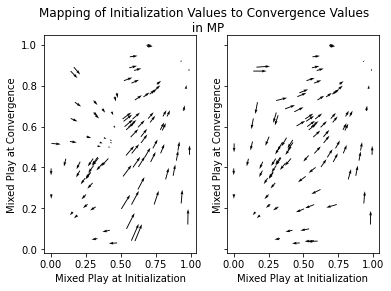

In [59]:
plot_vector_field(battle_of_sexes, "MP", 100, 100)

In [60]:
##Plot absolute 
changed_payoffs = [[1,1], [3,3], [5,5], [7,7], [9,9]]
plot_abs_frequency_Nash_Eq(coordination_game_2, nashEqs["coordination_game_2"], (1,1), changed_payoffs, 500, 800)

KeyboardInterrupt: 

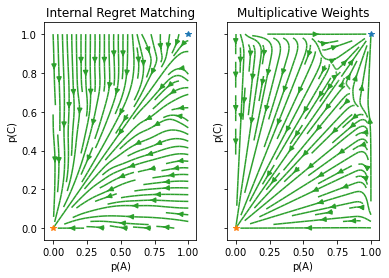

In [183]:
stream_plot(stag_and_hare, "stag_and_hare", 150, 10, nashEqs["stag_and_hare"], mult_IR = 40)

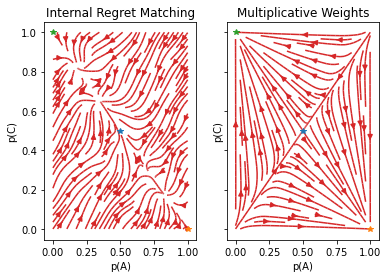

In [187]:
stream_plot(hawk_and_dowe, "hawk_and_dowe", 40, 10, nashEqs["hawk_and_dowe"], mult_IR = 60)

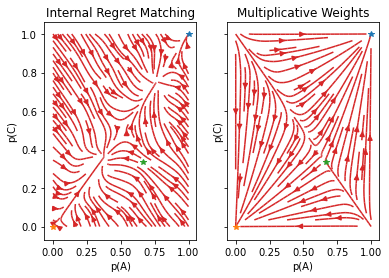

In [176]:
stream_plot(battle_of_sexes, "battle_of_sexes", 40, 10, nashEqs["battle_of_sexes"], mult_IR = 60)

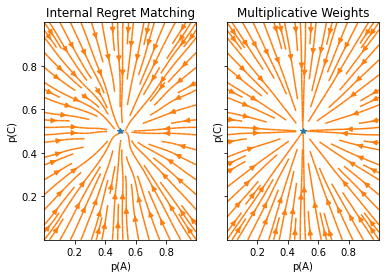

In [205]:
stream_plot(matching_pennies, "matching_pennies", 4000, 10, nashEqs["matching_pennies"], mult_IR = 2)

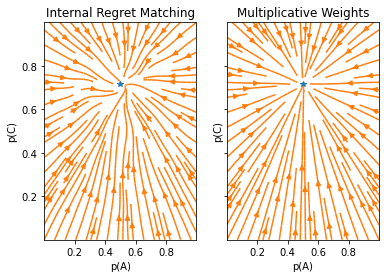

In [180]:
stream_plot(inspection_game, "inspection_game", 10000, 10, nashEqs["inspection_game"], mult_IR = 1)

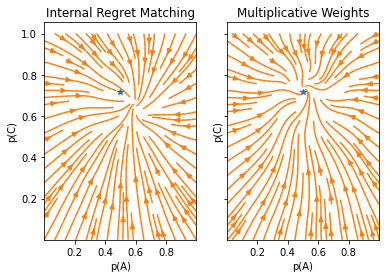

In [179]:
stream_plot(inspection_game, "inspection_game", 50, 10, nashEqs["inspection_game"], mult_IR = 50)

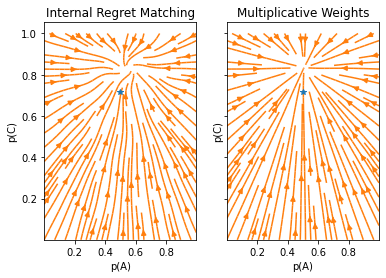

In [198]:
stream_plot(inspection_game_low_punishment, "inspection_game_low_punishment", 10000, 10, nashEqs["inspection_game"], mult_IR = 1)

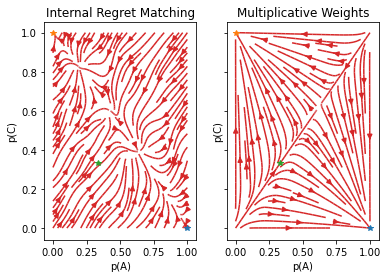

In [207]:
stream_plot(chicken, "chicken", 40, 10, nashEqs["chicken"], mult_IR = 60)

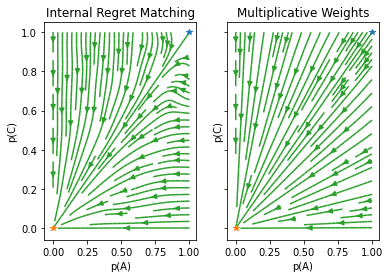

In [225]:
stream_plot(harm_my_neighbor, "harm_my_neighbor", 40, 10, nashEqs["harm_my_neighbor"], mult_IR = 60)

In [ ]:
stream_plot(, "Three_Nash_Game", 500, 10, nashEqs["game_three_nash"])

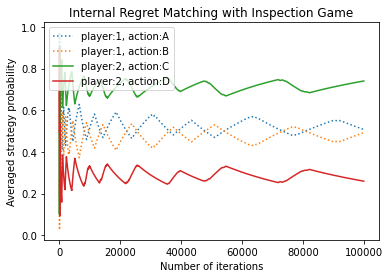

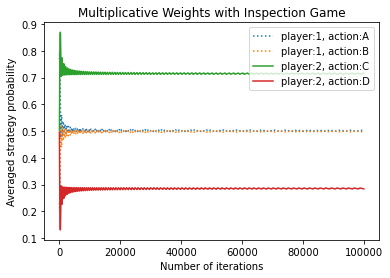

In [150]:
plot_comparison_MWA_vs_IRM(inspection_game, "Inspection Game", initial_random_distribution(inspection_game), max_steps = 100000)

In [216]:
choose_my(harm_my_neighbor)

[1.0001, 0.0001]

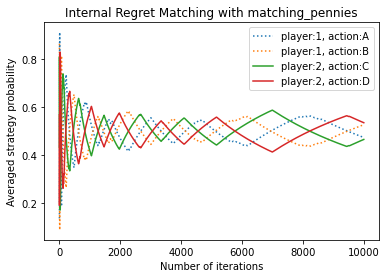

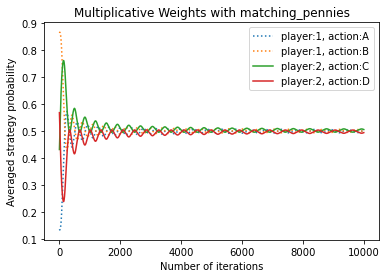

In [220]:
plot_comparison_MWA_vs_IRM(matching_pennies, "matching_pennies", initial_random_distribution(matching_pennies), max_steps = 10000)

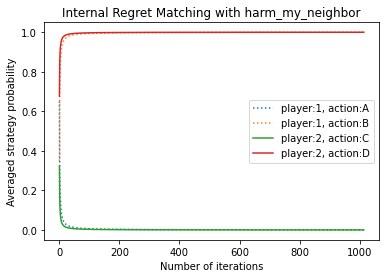

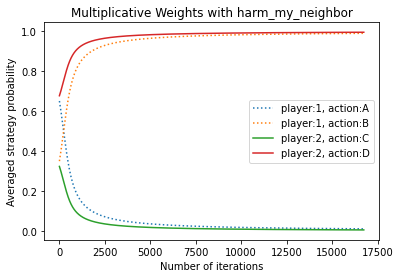

In [226]:
plot_comparison_MWA_vs_IRM(harm_my_neighbor, "harm_my_neighbor", initial_random_distribution(harm_my_neighbor), max_steps = 100000)

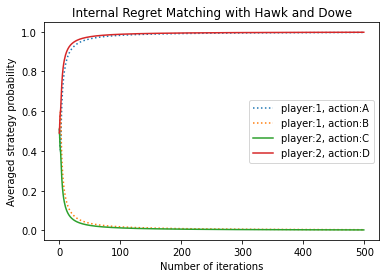

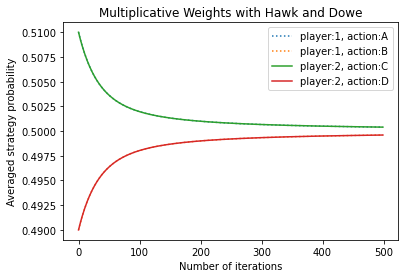

In [139]:
plot_comparison_MWA_vs_IRM(hawk_and_dowe, "Hawk and Dowe", [[0.51, 0.49], [0.51, 0.49]], max_steps = 500)

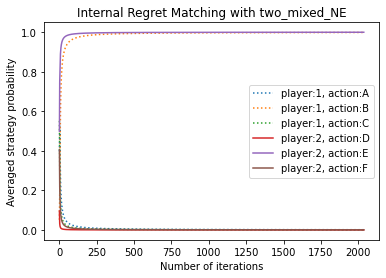

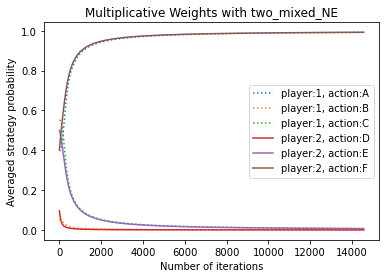

In [202]:
plot_comparison_MWA_vs_IRM(two_mixed_NE, "two_mixed_NE",initial_random_distribution(two_mixed_NE))

In [ ]:
plot_comparison_MWA_vs_IRM(coordination_game, "Coordination Game", initial_random_distribution(coordination_game), epsilon = 0.00001)

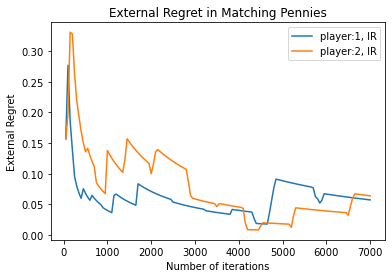

In [275]:
plot_player_regret(matching_pennies, "Matching Pennies", 7000, scaling = 50)

In [ ]:
plot_player_regret(matching_pennies, "Matching Pennies", 7000, scaling = 50)

15000
15000


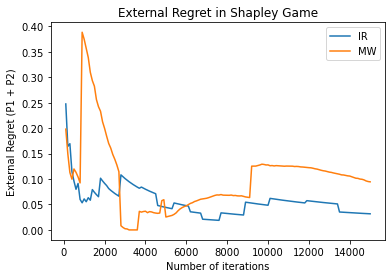

In [269]:
plot_total_regret(shapley_game, "Shapley Game", 15000, scaling = 100)

15000
15000


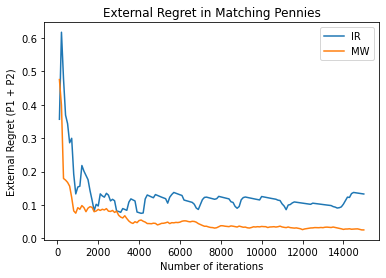

In [270]:
plot_total_regret(matching_pennies, "Matching Pennies", 15000, scaling = 100)

15000
15000


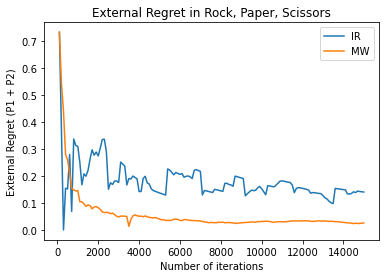

In [267]:
plot_total_regret(schere_stein_papier, "Rock, Paper, Scissors", 15000, scaling = 100)